# An Introduction to Signal Detection Theory
##### by Bonnie Cooper  bcooper@sunyopt.edu
![](https://i.imgur.com/ObloOpj.png)
#### This notebook complements Lecture 2 of Spring Semester Proseminar of the Vision Science PhD program at SUNY College of Optometry


Signal Detection Theory (SDT) provides a set of methods for interpreting noisy data where accuracy of the result is of interest. The groundwork for SDT was developed for military applications during WW2 when military strategic planning became heavily reliant on radar. Radar operators were faced with the challenge of reliably discriminating target signals from noisy signals from the readouts of noisy instrumentation. Decisions were costly: miss a target and waste a strategic gain, mistake noise for target and risk the misallocation of costly resources and time. SDT was formalized in the early 50s and soon therafter Green & Swets applied SDT to psychophysics in thier seminal text, 'Signal Detection Theory & Psychophysics' (1966). Green & Swets were frustrated by how the field of psychophysics at the time was unable to disassociate a subjects true sensitivity to a sensory signal from the response biases inherent to the cognitive process of decision making. SDT is very helpful for understanding the decision criteria employed by a subject.

SDT assumes noise. SDT assumes that noise is present, pervasive & constant is the system that the subject is observing. SDT assumes that noise is added to signals experienced by the observer. Let us demonstrate this by adding some noise to simulated data:

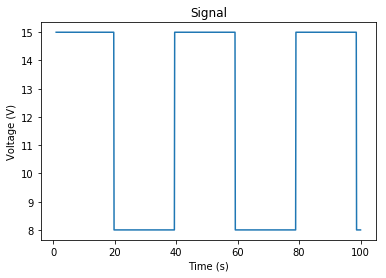

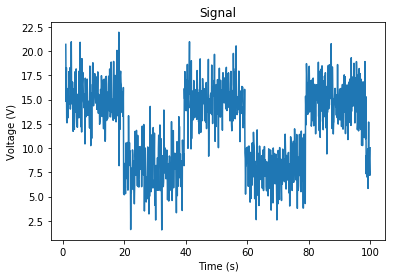

1000


In [17]:
#MAKE CHANGES TO THESE VARIABLES & OBSERVE THE EFFECTS ON THE SIMULATED DATA WE GENERATE                                                                                              
mean_baseline = 8
mean_signal = 15
# Set a target Signal-to-Noise Ratio
#try running this cell block with values 0.15, 0.5, 1.5, 5, 50
target_snr_db = 1.50
# 
#-------------------------------------------------------------------------------------------------------------------



import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = mean_signal*np.sin(t/(2*np.pi))
# Calculate noise then convert to watts
noise_avg_db = mean_baseline - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(t))

#square waves1 
sqrwv1 =  x_volts
sqrwv1[sqrwv1 > 0] = mean_signal
sqrwv1[sqrwv1 < 0] = mean_baseline
sqrwv1_NOISE = sqrwv1 + noise_volts

plt.plot(t, sqrwv1)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

plt.plot(t, sqrwv1_NOISE)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

print( len(y_volts))

<br> 

The top figure shows the voltage profile for our signal in a perfect system with zero noise. For the sake of this demo, let us assume that when the signal is off, the mean baseline voltage is 'mean_baseline'. When the signal is turn on, the voltage increases to 'mean_signal'. In a perfect system, our signal will have a resting potential of 'mean_baseline' (the notebook initializes with the value 8). Then, the signal undergoes a process, maybe a switch is flipped or a solenoid opens, and the volate increases to 'mean_signal' (the notebook initialized to 15).  

In the top figure, it is very obvious when the signal changes. However, if we add noise to the signal as in the bottom figure, depending on the relative amplitude of the noise, it can be very difficult to disambiguate when the signal changes.  

Now, lets imagine that we take a number of samples (e.g. 1000) of both baseline and signal from the noisy data. To do that, let's simulate two normal distributions of signal data + noise and some baseline + noise and visualize the distributions as a histogram.  

Change the values of the variables in the next cell to see how this effects the distribution of the data
<br><br>    



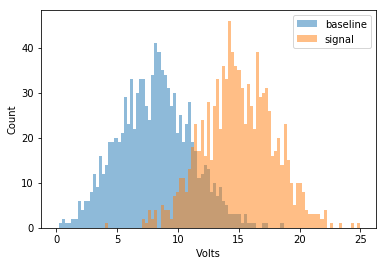

In [23]:
#MAKE CHANGES TO THESE VARIABLES & OBSERVE THE EFFECTS ON THE SIMULATED DATA WE GENERATE                       
numSamples = 1000
mean_baseline = 8
mean_signal = 15
baseline_noise = 3
signal_noise = 3
#
#------------------------------------------------------------------------------------------------------------------


import random
import numpy
from matplotlib import pyplot

baseline = np.array([random.gauss(mean_baseline,baseline_noise) for _ in range(numSamples)])
signal = np.array([random.gauss(mean_signal,signal_noise) for _ in range(numSamples)])

bins = numpy.linspace( 0, 25, 100)

pyplot.hist(baseline, bins, alpha=0.5, label='baseline')
pyplot.hist(signal, bins, alpha=0.5, label='signal')
pyplot.legend(loc='upper right')
pyplot.xlabel('Volts')
pyplot.ylabel('Count')
pyplot.show()

#pyplot.hist(baseline, bins, color = "blue", ec="blue", alpha=1, label='baseline')
#pyplot.hist(signal, bins, color = "blue", ec="blue", alpha=1, label='signal')
#pyplot.legend(loc='upper right')
#pyplot.show()


From the figure above, we can see that the two distributions for baseline and signal have quite a bit of overlap. If we were to randomly pick a datapoint and the value was, say,10 Volts, we would not be able to say whether this measurement came from a time where the signal was switched on or off. If we were to randomly pick a datapoint of 5Volts, we could still only say that it probably came form a baseline measure; we could not say so definitively.

For interpreting overlapping data distributions, there are four possible outcomes:  

1. True Positive (Hit): We Identify the data as signal when it really is signal
2. False Positive (False Alarm): We identify the data as signal when it is really just baseline noise
3. False Negative (Miss): We identify the data as noise when, infact, there was a signal present
4. Correct Rejection: We identifiy the data as noise when it really is noise

There are two features of the data that effect how much two data distributions overlap:  

1. The amplitude of the noise
2. The relative amplitude of the signal  
You can observe this for yourself by changing the values for mean_baseline, mean_signal, signal_noise.
For this demo, let's assume that baseline and signal have the same noise amplitude.

Signal Detection Theory is a set of tools to help interpret situations where decision about a signal are made with uncertainty. SDT assumes that there is a threshold, or **criterion** that guides the decision process in the presense of noise. Datapoints above the criterion are labeled signal, whereas datapoints below the criterion are labeled noise.

The figure below gives a good summary of this:

![](https://i0.wp.com/www.frontiersin.org/files/Articles/147101/fpsyg-06-00762-HTML/image_m/fpsyg-06-00762-g001.jpg?w=584&ssl=1)





Let's pick an arbitrary values to be a criterion for an example Ideal Observer Response. An ideal observer will act in a binary manner: everything below the threshold will be considered noise and everything equal to or above threshold will be considered signal.  
We will then calculate the hits, misses, false alarms and correct reject rates for this criterion.

Hit rate: 0.96
Miss rate: 0.04
False alarm rate: 0.26
Correct rejection rate: 0.74


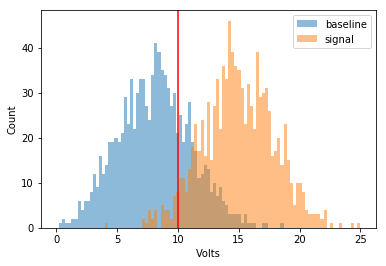

In [25]:
#MAKE CHANGES TO THIS CRITERION VARIABLE & OBSERVE THE EFFECTS ON THE NUMBER OF HITS, MISSES, etc.       
criterion = 10
#
#------------------------------------------------------------------------------------------------------------------

hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("Miss rate: {:.2f}".format(missrate))
print("False alarm rate: {:.2f}".format(farate))
print("Correct rejection rate: {:.2f}".format(crrate))


pyplot.hist(baseline, bins, alpha=0.5, label='baseline')
pyplot.hist(signal, bins, alpha=0.5, label='signal')
pyplot.axvline(x=criterion, color='red')
pyplot.legend(loc='upper right')
pyplot.xlabel('Volts')
pyplot.ylabel('Count')
pyplot.show()

Now we can calculate the d' (d prime), or sensitivity index for the data with this particular criterion. The d' informs us about the degree of seperation of the means of the signal and noise distributions while weighing them against the respective standard deviations.

In [64]:
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

d prime: 1.60


Now, let's assume that it is very costly to miss a signal. Perhaps your subject is being given a jiuce reward and is very motivated to get this treat!
Such an observer would place the criterion very low to recieve the maximum reward even though it means accepting a higher false positive rate.  
  
Will the d' be higher or lower?

In [27]:
criterion = 6
hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("False alarm rate: {:.2f}".format(farate))
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

Hit rate: 1.00
False alarm rate: 0.75
d prime: 2.42


Now let's assume that there is a penalty for incorrectly indicating the presense of the signal. Maybe an annoying sound is played in the psychopysics lab, or perhaps the subject gets less payment (would the IRB approve that?!?)
  
Will the d' be higher or lower?

In [29]:
criterion = 18
hit = signal[signal>=criterion]
miss = signal[signal<criterion]
fa = baseline[baseline>=criterion] #false alarms
cr = baseline[baseline<criterion] #correct rejects

hitrate = len(hit)/len(signal)
missrate = len(miss)/len(signal)
farate = len(fa)/len(baseline)
crrate = len(cr)/len(baseline)

print("Hit rate: {:.2f}".format(hitrate))
print("False alarm rate: {:.2f}".format(farate))
from scipy import stats
dprime = stats.norm.ppf(hitrate) - stats.norm.ppf(farate)
print("d prime: {:.2f}".format(dprime))

Hit rate: 0.15
False alarm rate: 0.00
d prime: 2.08


Next we will generate an ROC Curve. An ROC curve will visualize the d' values as the hit rate x the false alarm rate for all possible criteria settings.

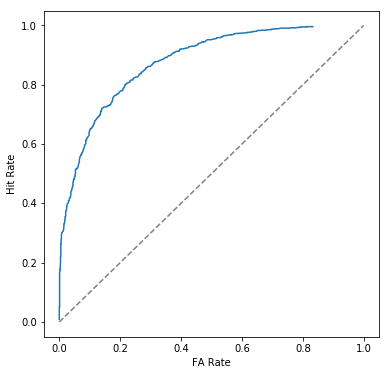

In [65]:

criterions = np.linspace(15, 0, 1000)
hit_rates = [len(signal[signal>c])/len(signal) for c in criterions]
fa_rates = [len(baseline[baseline>c])/len(baseline) for c in criterions]

f, ax = plt.subplots(figsize=(6, 6))
ax.plot(fa_rates, hit_rates)
ax.plot([0, 1], [0, 1], ls="--", c=".5")
ax.set(xlabel="FA Rate", ylabel="Hit Rate");

Now to calculate the **AUC: Area Under the Curve**. The AUC is a quantified measure of how realiably a signal can be discriminated from noise.

In [57]:
from scipy.integrate import trapz
auc = trapz(hit_rates, fa_rates)
print("Area under ROC curve: {:.2f}".format(auc))

Area under ROC curve: 0.92
